### Step 1: Import data and initial observations

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [7]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Step 2: Bag-of-words feature representation for descriptive text

Drawing lessons from the first assignment, I expanded the bag-of-words starter code to include more features as well as necessary modification to feature properties and regulation.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 13767)

### Step 3: Fit Kmeans model

In [9]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans

#### First plot inertia scores by number of clusters

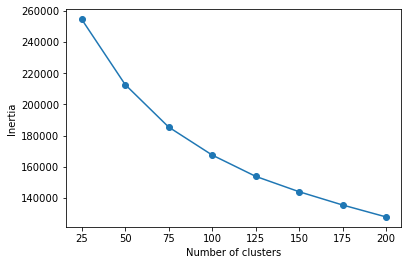

In [12]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []
ranges = [25,50,75,100,125,150,175,200]

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in ranges:
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(ranges, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Second plot inertia scores based on first plot

ValueError: x and y must have same first dimension, but have shapes (50,) and (8,)

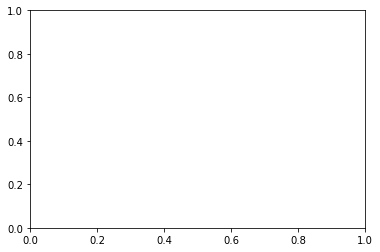

In [13]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions2 = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in (75,125):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions2.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(75,125), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### labels are named with integers and stored in the `labels_` attribute

In [8]:
km.labels_

array([31, 34, 34, ..., 34,  3, 16], dtype=int32)

### take a look at one of the cluster results

In [9]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 15:
        print(raw_data['product_description'][i])
        print('**********')

Golden delicious whole fresh apples,   Apple Ridge 5lb, 2-3/4  apples, packaged in red net mesh bags  "	3lb, 2-1/2  apples, packaged in poly bags  "	2lb, 2-1/2  apples, packaged in poly bags  "	45ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays with re-useable plastic container boxes  "	55ct, individual apples on trays with re-useable plastic container boxes  "	60ct  individual apples on trays with re-useable plastic container boxes  "	78ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays in cardboard tray  boxes  "	55ct, individual apples on trays in cardboard tray  boxes      
**********
Fuji, whole fresh apples,   Apple Ridge 5lb, 2-3/4  apples, packaged in red net mesh bags  "	3lb, 2-1/2  apples, packaged in poly bags  "	2lb, 2-1/2  apples, packaged in poly bags  "	45ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays w